In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [5]:
#Reading the csv file Mall_Customers.csv
data = pd.read_csv('/content/drive/MyDrive/MAR6669-data/Mall_Customers.csv')
data.shape

(200, 5)

In [6]:
# The data has 200 entries, that is data from 200 customers.
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### K means clustering based on annual income and spending score

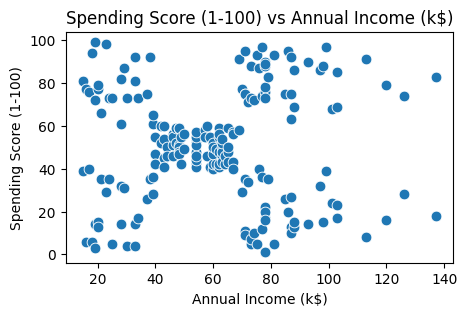

In [7]:
X = data[["Annual Income (k$)","Spending Score (1-100)"]]

#Scatterplot of the input data
plt.figure(figsize=(5,3))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

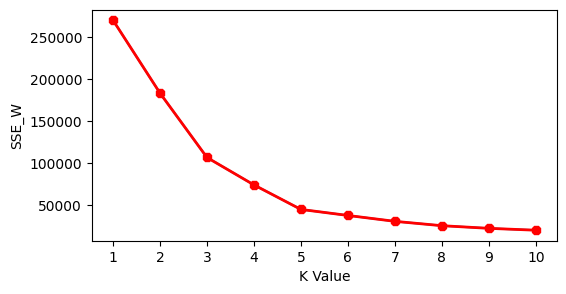

In [8]:
# plot the elbow curve to find the optimal number of clusters
ss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    ss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(6,3))
plt.plot(range(1,11),ss)
plt.plot(range(1,11),ss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSE_W")
plt.show()

In [9]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
data["label"] = y
#The new dataframe with the clustering done
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


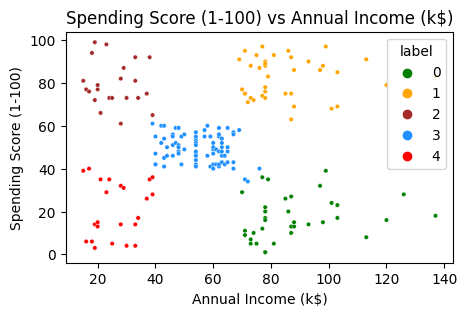

In [10]:
# Scatterplot of the clusters
# One cluster is the customers with the least income and least spending score; one cluster is the customers with the most income and most spending score.

plt.figure(figsize=(5,3))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = data, s = 10 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()